
1. <b> Forward propagation (전방향) </b><br>
학습 방법 (파라미터 업데이트) : 𝒘 = 𝒘− 𝛄(𝞉 𝒆𝒓𝒓𝒐𝒓/ 𝞉 𝒘) <br>
수치미분을 통해  𝛄(𝞉 𝒆𝒓𝒓𝒐𝒓/ 𝞉 𝒘) 값을 작은값으로 처리 해준 것 <br>
BUT, parameter수가 증가시 수치미분으로 가능한가 ? <br>
가능은 하지만 경사하강법을 수행시 미분을 해야하는데, <br>
파라미터당 미분에 걸리는 시간이 너무 오래걸림 <br>
 
<br>

2. <b>  역전파 알고리즘  </b><br>
우린 미분이아니라, 학습을 하고 싶은 것이니 (목표 : Learning) 미분을 수행 하지않고 학습에 필요한 경사값(Gradient) 즉,미분값을 얻어보자.  
- 필요 기술요소 
   1. <b> 미분의 연쇄법칙 (Chain Rule)</b> : 합성함수를 미분은 합성함수를 구성하는 개별함수 미분의 곱으로 처리
      (편미분을 구할때 겉미분, 속미분 절차가 각각 개별함수의 미분의 곱 처리 절차였다.)
    - 신경망 모델은 합성함수다.
     - 합성함수 <br> 
       𝒚𝒉𝒂𝒕₁ : 𝒔𝒊𝒈𝒎𝒐𝒊𝒅(𝒘𝒙+𝒃) <br>
       𝒚𝒉𝒂𝒕₂ : 𝒔𝒊𝒈𝒎𝒐𝒊𝒅( 𝒘 * 𝒚𝒉𝒂𝒕₁ + 𝒃) <br>
       = 𝒔𝒊𝒈𝒎𝒐𝒊𝒅( 𝒘 * (𝒔𝒊𝒈𝒎𝒐𝒊𝒅(𝒘𝒙+𝒃)) + 𝒃)  <br>
       𝒚𝒉𝒂𝒕₃ : 𝒔𝒊𝒈𝒎𝒐𝒊𝒅( 𝒘 * 𝒚𝒉𝒂𝒕₂ + 𝒃) <br>

        [합성곱 예시]

          𝑻 = 3𝒙 + 4𝒚 <br>
          𝒛 = 𝒕² <br>
          𝞉𝒛 / 𝞉𝒕 = 2𝒕 <br>
          𝞉𝒕  /𝞉𝒙 = 3 <br>
          (𝞉𝒛 / 𝞉𝒕) * (𝞉𝒕  /𝞉𝒙) = 2𝒕 * 3 = 2(3𝒙 + 4𝒚) +3 <br>
          = 6(3𝒙 + 4𝒚) <br><br>
      
  2. <b> Error Backpropagation </b> <br>

    - step1. forward propagation에서 얻은 에러 ```(𝒚 - 𝒚𝒉𝒂𝒕)``` <br>
      - 초기 w 파라미터 값은 랜덤값으로 지정되어 미분 필요 없음  <br> 
      -  단, 로컬미니멈에 빠질 수 있어 랜덤값도 여러번 수행 해보는 것이 좋다. <br> <br>
  
    - step2. 연쇄법칙을 적용하여 가중치(𝒘) 업데이트  <br>
            ```𝒘 = 𝒘 - 𝛄 * 오차값 * 출력값(1-출력값) * 입력값``` <br>

    - step3. 얼마나 에러가 감소하였는지 평가  <br><br>
     <br>

    [역전파 예시]

       𝒆𝒓𝒓𝒐𝒓/ 𝞉 𝒘₁ 의 미분 값은 아래와 같이 3개의 합성함수 미분의 곱으로 처리 가능
    = 오차값 편미분 • 출력값 편미분 • 입력값 편미분  <br>
    = (𝞉 𝒆𝒓𝒓𝒐𝒓 / 𝞉𝒚₂) • (𝞉 𝒚₂ / 𝞉 𝒘𝒔 )• (𝞉 𝒘𝒔 / 𝞉 𝒘) <br>
    = (𝒚𝒉𝒂𝒕₂ - 𝒚₂) • 𝒚𝒉𝒂𝒕₂(1-𝒚𝒉𝒂𝒕₂) •  𝒚𝒉𝒂𝒕₁ <br>

        ⬇︎ 
    <br>
  
  - 입력값(𝞉𝒘𝒔) 의 미분값 = 이전 노드의 출력값(= 즉 해당노드의 입력값) <br>
  - 출력값(𝞉𝒚₂) 의 미분값 = 출력값 * (1 - 출력값) <br>
    = 𝒔𝒊𝒈𝒎𝒐𝒊𝒅(𝒙) * (1- 𝒔𝒊𝒈𝒎𝒐𝒊𝒅(𝒙))  <br> 
  - 오차값(𝞉 𝒆𝒓𝒓𝒐𝒓)의 미분값 : 오차값 <br>

<br><br>

          결론 : 오차값 * 출력값(1-출력값) * 입력값이
          순전파의 (𝞉 𝒆𝒓𝒓𝒐𝒓/ 𝞉 𝒘) 미분값을 대체하게 됨 
          이때 오차 값은 back propagation을 통해 전달받음 
          이로인해 연산시간의 문제점은 해결!
  

<br><br>

참고
 - 𝞡 : w,b 모두포함
 - 1 epoch : 순전파가고 오차구해서 (미분하지않고) <br> 역전파를 통해 학습량 구하기 까지가 1 epoch

# Error Backpropagation

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. 실습용 데이터 생성

In [ ]:
import numpy as np
np.set_printoptions(suppress = True, precision = 3)

> ## 1) Input : X (4 * 3)

In [ ]:
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

> ## 2) Output : y (4 * 1)

In [ ]:
y = np.array([0., 1., 1., 0.]).reshape(4, 1)

y

array([[0.],
       [1.],
       [1.],
       [0.]])

> ## 3) W1 (3 * 4)

In [ ]:
np.random.seed(2045)
W1 = np.random.rand(3, 4)

W1

array([[0.844, 0.886, 0.139, 0.061],
       [0.192, 0.532, 0.155, 0.827],
       [0.92 , 0.015, 0.49 , 0.692]])

> ## 4) W2 (4 * 1)

In [ ]:
np.random.seed(2046)
W2 = np.random.rand(4)

W2 = W2.reshape(4, 1)
W2

array([[0.895],
       [0.596],
       [0.436],
       [0.153]])

> ## 5) y_hat (4 * 1)

In [ ]:
np.random.seed(2045)
y_hat = np.random.rand(4).reshape(4, 1)

y_hat

array([[0.844],
       [0.886],
       [0.139],
       [0.061]])

> ## 6) Layer1 (4 * 4)
 - 행렬연산을 위해 shape를 맞춰줌

In [ ]:
Layer1 = np.ones([4, 4])

Layer1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

# II. 함수 정의

> ## 1) sigmoid( )

* Activation Function

In [ ]:
def sigmoid(x):
    y_hat = 1 / (1 + np.exp(-x))
    return y_hat

> ## 2) d_sigmoid( )

* sigmoid( ) 미분함수

In [ ]:
def d_sigmoid(x):
    dy = x * (1.0 - x)
    return dy

> ## 3)Loss function

* Mean Squared Error

In [ ]:
# def loss_function(y, y_hat):
#   Loss = np.mean((y - y_hat) ** 2)
#   return Loss 

* Binary Cross Entropy Error

In [ ]:
def loss_function(y, y_hat):
  Loss = -np.mean((y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
  return Loss 

# III. 순방향과 역방향 함수 정의

> ## 1) Forward_Propagation

* Layer1 Output
 * Layer1 = sigmoid(np.dot(X, W1))
* y_hat Output
 * y_hat = sigmoid(np.dot(Layer1, W2))

In [ ]:
def forwardProp(X, W1, Layer1, W2, y_hat):
    Layer1 = sigmoid(np.dot(X, W1))
    y_hat = sigmoid(np.dot(Layer1, W2))

    return Layer1, y_hat

> ## 2) Back_Propagation

* d_W2
 * d_W2 = np.dot(Layer1, ((y_hat - y) * d_sigmoid(y_hat)))

<br>

* d_W1
 * d_W1 = np.dot(((y_hat - y) * d_sigmoid(y_hat)), np.transpose(W2))
 * d_W1 = d_W1 * d_sigmoid(Layer1)
 * d_W1 = np.dot(np.transpose(X), d_W1)

<br>

* Gradient Descent
 * W1 = W1 - 0.8 * d_W1
 * W2 = W2 - 0.8 * d_W2

In [ ]:
def backProp(X, y, y_hat, Layer1, W1, W2):
    d_W2 = np.dot(Layer1, ((y_hat - y) * d_sigmoid(y_hat)))

    d_W1 = np.dot(((y_hat - y) * d_sigmoid(y_hat)), np.transpose(W2))
    d_W1 = d_W1 * d_sigmoid(Layer1)
    d_W1 = np.dot(np.transpose(X), d_W1)

    W1 = W1 - 0.8 * d_W1
    W2 = W2 - 0.8 * d_W2

    return y_hat, Layer1, W1, W2

# IV. 오차역전파를 적용한 Gradient Descent

* 학습 과정의 Loss 값 저장 객체

In [ ]:
Loss_Record = []

> ## 1) Learning with Error Backpropagation

In [ ]:
for k in range(0, 2000):
    Layer1, y_hat = forwardProp(X, W1, Layer1, W2, y_hat)
    y_hat, Layer1, W1, W2 = backProp(X, y, y_hat, Layer1, W1, W2)
    
    Loss_Record.append(loss_function(y, y_hat))

> ## 2) Parameter Update Check

* W1

In [ ]:
W1

array([[ 4.249, -3.19 ,  5.47 ,  2.429],
       [ 3.185, -3.703,  6.202,  2.731],
       [-5.472,  0.857, -2.302, -3.605]])

* W2

In [ ]:
W2

array([[-2.247],
       [-5.244],
       [ 6.988],
       [-9.85 ]])

* y_hat

In [ ]:
# y_hat.round()

y_hat

array([[0.035],
       [0.969],
       [0.968],
       [0.042]])

> ## 3) Visualization

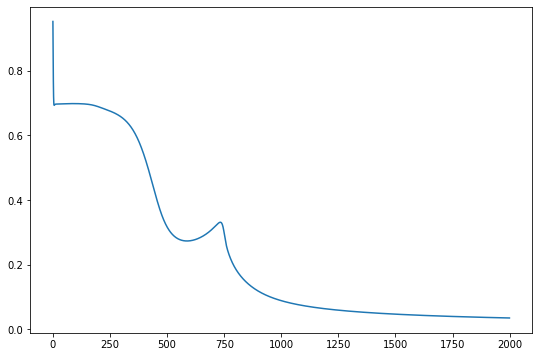

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.plot(Loss_Record)
plt.show()

# 
# 
# 
# The End
# 
# 
# 